In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import *

# Residual Network Architechture via Model Subclassing

### Convolutional Residual Block

In [32]:
class ConvResidualBlock(models.Model):
    def __init__(self, n_layers=2, filters=32, size=(3, 3), strides=(1, 1), activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden = [layers.Conv2D(filters, kernel_size=size, strides=strides, 
                                     activation=activation) for _ in range(n_layers - 1)]
        self.out = layers.Conv2D(filters, kernel_size=size, strides=strides)

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        x = self.out(x)
        x = layers.Activation('relu')(x + inputs)
        return x

### Dense Residual Block

In [34]:
class DenseResidualBlock(models.Model):
    def __init__(self, n_layers=2, units=32, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden = [layers.Dense(units, activation=activation) for _ in range(n_layers - 1)]
        self.out = layers.Dense(units)
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        x = self.out(x)
        x = layers.Activation('relu')(x + inputs)
        return x

##  Residual Network Model

In [35]:
class ResidualNetwork(models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden = layers.Dense(32, activation='relu')
        self.conv_block = ConvResidualBlock(2, filters=32)
        self.dense_block = DenseResidualBlock(2, units=64)
        self.out = layers.Dense(1, activation='sigmoid')
        
        
    
    def call(self, inputs):
        x = self.hidden(inputs)
        x = self.conv_block(x)
        x = layers.Flatten()(x)
        for _ in range(3):
            x = self.dense_block(x)
        return self.out(x)

In [46]:
model = ResidualNetwork()

In [56]:
block = DenseResidualBlock(2, 32)

In [59]:
block(tf.ones(shape=(1,1)))

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[1.030118  , 1.1409507 , 1.0800962 , 0.94833815, 0.9732132 ,
        1.0400605 , 0.9040522 , 0.9586142 , 1.1621989 , 1.2069325 ,
        0.9703806 , 1.2253554 , 0.975372  , 0.98463625, 0.709975  ,
        0.9778851 , 0.97617006, 1.1411189 , 1.1223145 , 1.0881917 ,
        1.1316369 , 1.1616691 , 0.91669226, 0.87061214, 1.1586074 ,
        1.2213728 , 0.80080056, 0.86393   , 1.0704875 , 1.1496078 ,
        0.89128435, 0.9047879 ]], dtype=float32)>

In [60]:
block.summary()

Model: "dense_residual_block_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            multiple                  64        
                                                                 
 dense_28 (Dense)            multiple                  1056      
                                                                 
Total params: 1,120
Trainable params: 1,120
Non-trainable params: 0
_________________________________________________________________


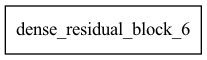

In [53]:
utils.plot_model(block, show_shapes=True)

In [37]:
model(tf.ones(shape=(1,5,5,1)))

InvalidArgumentError: Exception encountered when calling layer "dense_residual_block_4" (type DenseResidualBlock).

Incompatible shapes: [1,64] vs. [1,800] [Op:AddV2]

Call arguments received:
  • inputs=tf.Tensor(shape=(1, 800), dtype=float32)